In [2]:
import math
import numpy as np
from matplotlib import pyplot as plt

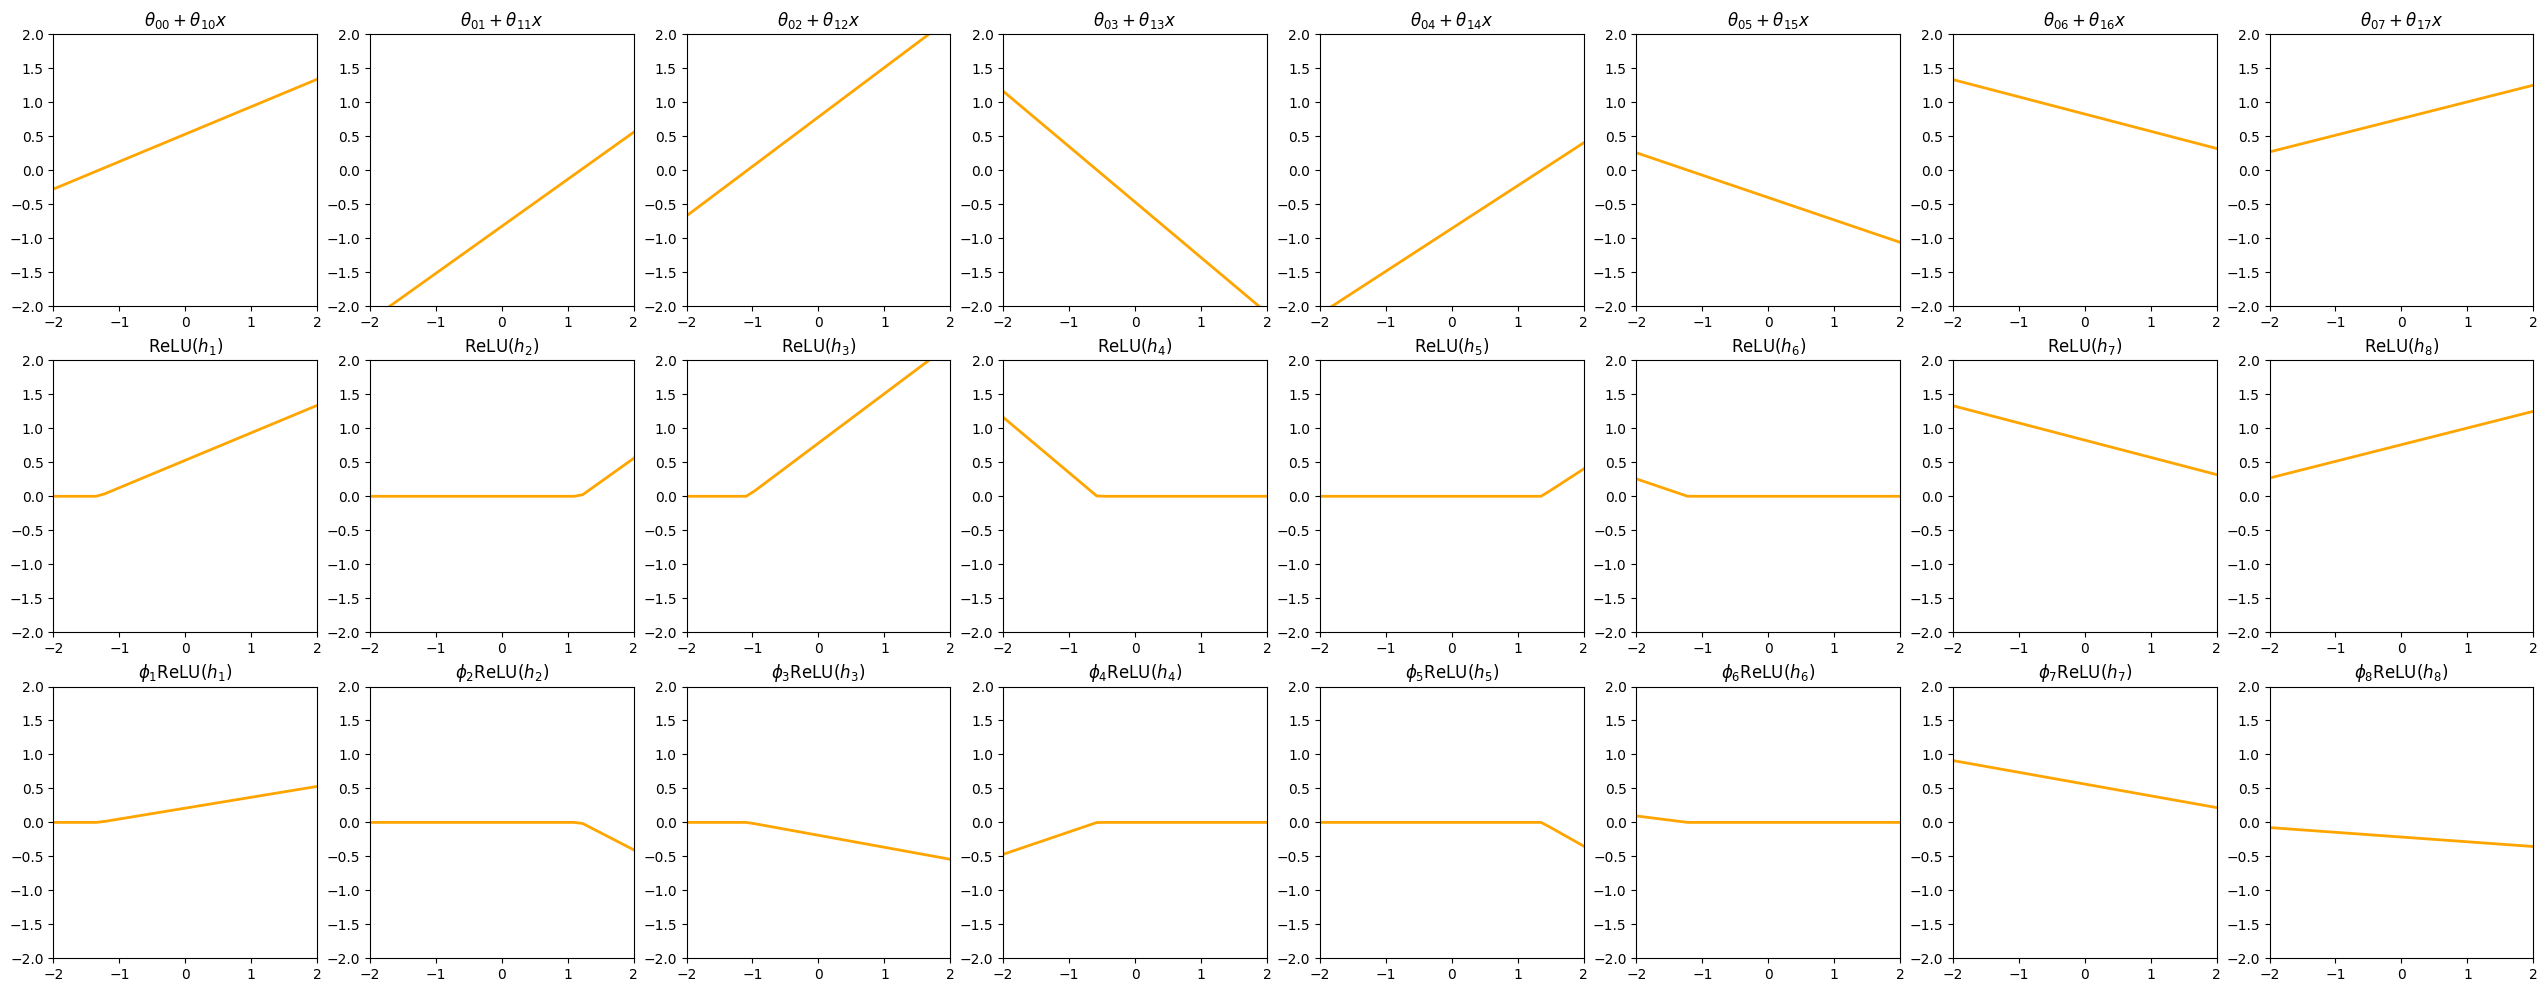

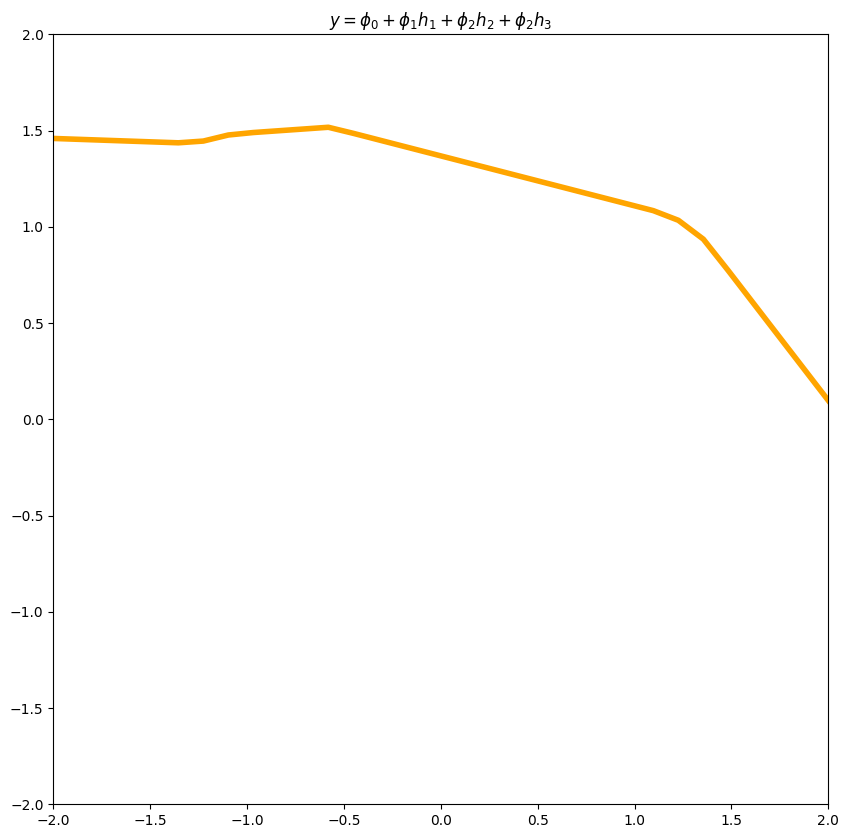

In [5]:
variables = 8
phi = np.random.random(variables) * 2 - 1
theta0 = np.random.random(variables) * 2 - 1
theta1 = np.random.random(variables) * 2 - 1

phi0 = 1
relu = lambda x: x if x > 0.0 else 0.0
vrelu = np.vectorize(relu)
sigmoid = lambda x: 1 / (1 + np.exp(-x))
vsigmoid = np.vectorize(sigmoid)
# activation_func = np.vectorize(math.erf)
activation_func = vrelu
size = 2
samples = 32

fig, axs = plt.subplots(3, variables, figsize=(4 * variables, 12))
for i in range(variables):
    X = np.linspace(-size, size, samples)
    Y = X * theta1[i] + theta0[i]
    axs[0, i].plot(X, Y, lw=2, c="orange")
    axs[0, i].set_title(rf"$\theta_{{0{i}}} + \theta_{{1{i}}} x$")
    axs[0, i].set_xlim([-size, size])
    axs[0, i].set_ylim([-size, size])
    Y = activation_func(Y)
    axs[1, i].plot(X, Y, lw=2, c="orange")
    axs[1, i].set_title(rf"ReLU$(h_{i+1})$")
    axs[1, i].set_xlim([-size, size])
    axs[1, i].set_ylim([-size, size])
    Y = phi[i] * Y
    axs[2, i].plot(X, Y, lw=2, c="orange")
    axs[2, i].set_title(rf"$\phi_{i+1}$ReLU$(h_{i+1})$")
    axs[2, i].set_xlim([-size, size])
    axs[2, i].set_ylim([-size, size])


f = np.vectorize(lambda x: np.dot(phi, activation_func(x * theta1 + theta0)) + phi0)
Y = f(X)
plt.figure(figsize=(10, 10))
plt.xlim(-size, size)
plt.ylim(-size, size)
plt.title(rf"$y = \phi_0 + \phi_1 h_1 + \phi_2 h_2 + \phi_2 h_3$")
plt.plot(X, Y, lw=4, c='orange');